In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time
import SimpleITK as sitk
import scipy.ndimage


import tensorflow as tf
from tensorflow import keras

In [2]:
candidates_file = r'C:\Users\user\Downloads\pfa\CSVFILES\candidates_V2.csv'
candidates_table = pd.read_csv(candidates_file)

annotations_file = r'C:\Users\user\Downloads\pfa\CSVFILES\annotations(1).csv'
annotations_table = pd.read_csv(annotations_file)

seriesuid_file = r'C:\Users\user\Downloads\pfa\CSVFILES\seriesuid.csv'
seriesuid_table = pd.read_csv(annotations_file)

In [3]:
def get_voxel_Z(self,z):
        """
        Converts Cartesian to voxel coordinates
        """
        origin = self.GetOrigin()
        resolution = self.GetSpacing()
        zz=(z-origin[2])/resolution[2]
        return zz



In [4]:
def import_class1(img_id):
    #return crop images class 1
    class1=[]
    img_ITK=sitk.ReadImage('C:/Users/user/Downloads/pfa/dataset/'+ img_id + '.mhd')
    img_np = sitk.GetArrayFromImage(img_ITK)

    bboxs = annotations_table[annotations_table['seriesuid']==img_id] 
    for index, row in bboxs.iterrows() :
            z=row['coordZ']
            zz=get_voxel_Z(img_ITK,z)
            image=img_np[int(zz)]
            class1=class1+[image]
            
    #print('Done for all!')
    return(class1)
    

In [11]:
class1=[]
for index, row in seriesuid_table.iterrows() :
    if index<30 :
        class1=class1+import_class1(row['seriesuid'])
        print(index)
    else : 
        break
print('fin')
print(str(len(class1)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
fin
78


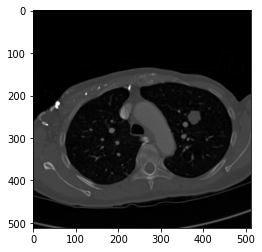

In [10]:
plt.imshow(class1[15])
plt.axis("on")
plt.gray()
plt.show()

In [7]:
print(class1[5])

[[ -987  -977  -979 ...  -997 -1000 -1000]
 [ -992  -977  -980 ... -1000  -980  -987]
 [ -989  -981  -985 ...  -979  -962 -1000]
 ...
 [ -961  -957  -942 ...  -942  -940  -950]
 [ -960  -969  -954 ...  -922  -919  -932]
 [ -935  -936  -937 ...  -956  -941  -926]]


In [8]:
img_id='1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860'
img_ITK=sitk.ReadImage('C:/Users/user/Downloads/pfa/dataset/'+ img_id + '.mhd')
print(img_ITK)

Image (000001D46E206C10)
  RTTI typeinfo:   class itk::Image<short,3>
  Reference Count: 1
  Modified Time: 7978
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 7951
  UpdateMTime: 7977
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 194]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 194]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 194]
  Spacing: [0.644531, 0.644531, 1.8]
  Origin: [-157.678, -311.678, -438.4]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.644531 0 0
0 0.644531 0
0 0 1.8

  PointToIndexMatrix: 
1.55152 0 0
0 1.55152 0
0 0 0.555556

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (000001D46B228BF0)
      RTTI typeinfo:   class itk::ImportImageContainer<unsig

In [ ]:
def normalize(image):
    image = (image - MIN_BOUND)/(MAX_BOUND - MIN_BOUND)
    image[image>1]=1
    image[image<0]=0
    return image